In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clean_data_df = pd.read_excel('product_clean_data_2023-11-27.xlsx')
sns.reset_defaults()

In [137]:
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   product_name                 1406 non-null   object        
 1   current_stock                1406 non-null   int64         
 2   shop_name                    1406 non-null   object        
 3   shop_id                      1406 non-null   int64         
 4   brand                        1403 non-null   object        
 5   unique_item_id               1406 non-null   int64         
 6   sold_per_month               1406 non-null   int64         
 7   historical_sold              1406 non-null   int64         
 8   liked_count                  1406 non-null   int64         
 9   variation_type               4 non-null      object        
 10  variation                    4 non-null      object        
 11  current_price                1406 non-null 

In [35]:
selected_columns = ['current_stock', 'sold_per_month', 'historical_sold', 'liked_count', 'current_price', 'min_price', 'max_price', 'rating_star', 'shop_rating']
clean_data_df[selected_columns].describe()

,current_stock,sold_per_month,historical_sold,liked_count,current_price,min_price,max_price,rating_star,shop_rating
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,109.089808,5.419102,104.503920,28.154669,3242.075552,3242.075552,3242.450463,2.456761,4.906129
std,322.827596,27.842890,552.756211,106.733331,4659.491473,4659.491473,4659.295061,2.453215,0.010763
min,1.000000,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000,0.000000,4.896200
25%,2.000000,0.000000,0.000000,0.000000,739.000000,739.000000,739.500000,0.000000,4.896200
50%,6.000000,0.000000,2.000000,2.000000,1849.000000,1849.000000,1849.000000,3.000000,4.896200
75%,30.000000,1.000000,21.000000,13.000000,3814.000000,3814.000000,3814.000000,5.000000,4.918500
max,4998.000000,469.000000,9938.000000,1619.000000,48999.000000,48999.000000,48999.000000,5.000000,4.921500


In [9]:
selected_columns = ['current_stock', 'sold_per_month', 'historical_sold', 'liked_count', 'current_price', 'min_price', 'max_price', 'rating_star', 'shop_rating']
std_value = np.std(clean_data_df[selected_columns])
mean_value = np.mean(clean_data_df[selected_columns])

variation_coefficient = (std_value/mean_value) * 100

variation_coefficient

/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


current_stock       29.099032
sold_per_month       2.509702
historical_sold     49.824335
liked_count          9.620728
current_price      419.997209
min_price          419.997209
max_price          419.979505
rating_star          0.221128
shop_rating          0.000970
dtype: float64

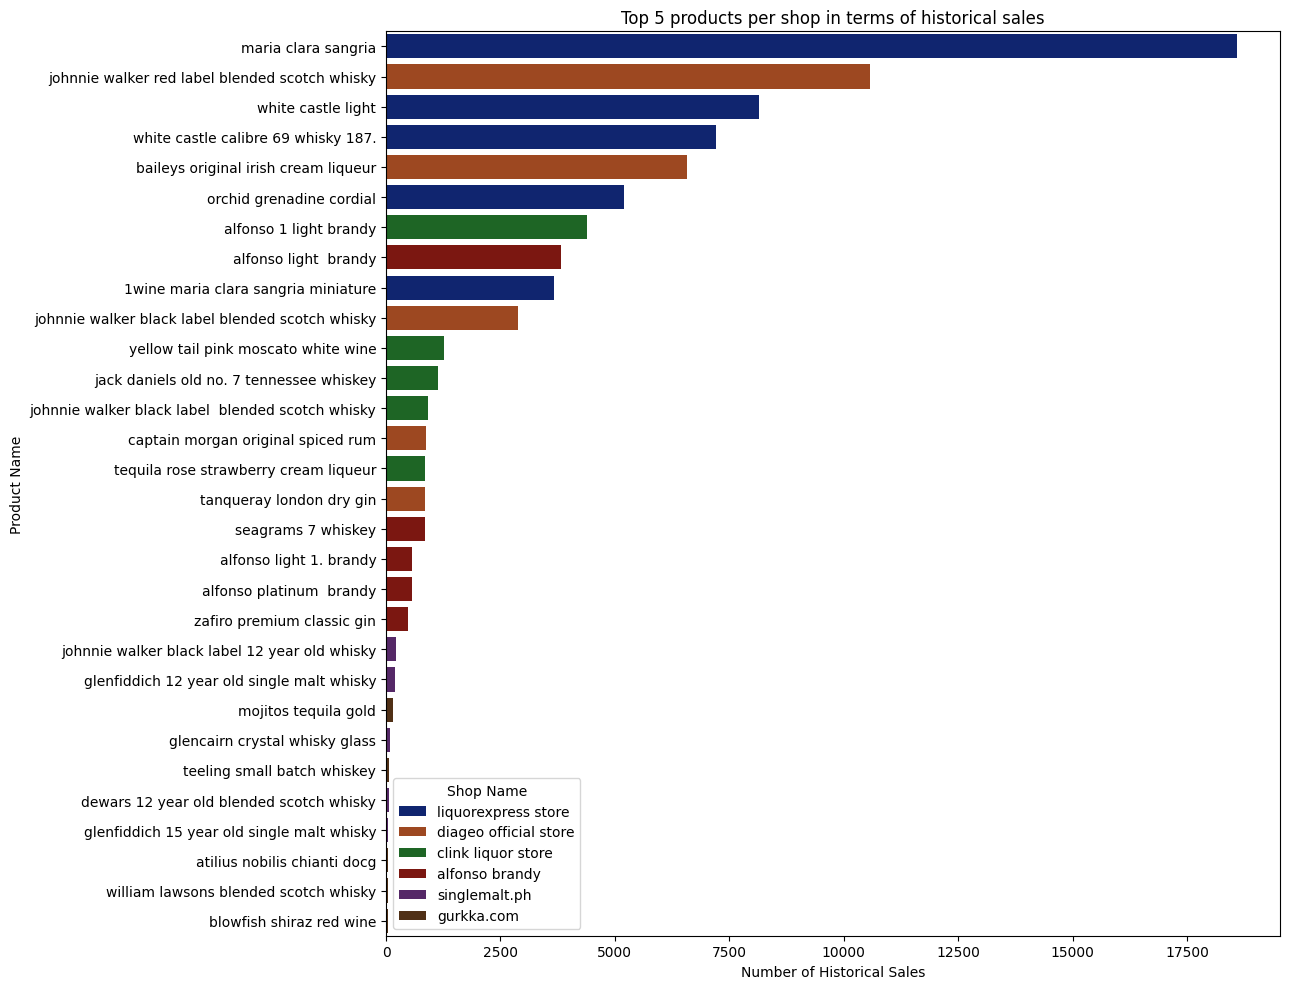

In [3]:
# Top 5 most sold product of each shop

# Group by 'product_name' and 'shop_name', and sum the 'historical_sold' to get total sales for each product in each shop
total_sales_per_product = clean_data_df.groupby(['product_name', 'shop_name'])['historical_sold'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
most_sold_products = total_sales_per_product.sort_values(by='historical_sold', ascending=False)

# Select the top 5 products per shop
top_products_by_shop = most_sold_products.groupby('shop_name').head(5)

plt.figure(figsize=(13, 10))
ax = sns.barplot(y='product_name', x='historical_sold', data=top_products_by_shop, hue='shop_name', palette='dark')
legend = ax.legend()
legend.set_title('Shop Name')
plt.xlabel('Number of Historical Sales')
plt.ylabel('Product Name')
plt.title('Top 5 products per shop in terms of historical sales')
plt.tight_layout()
plt.show()

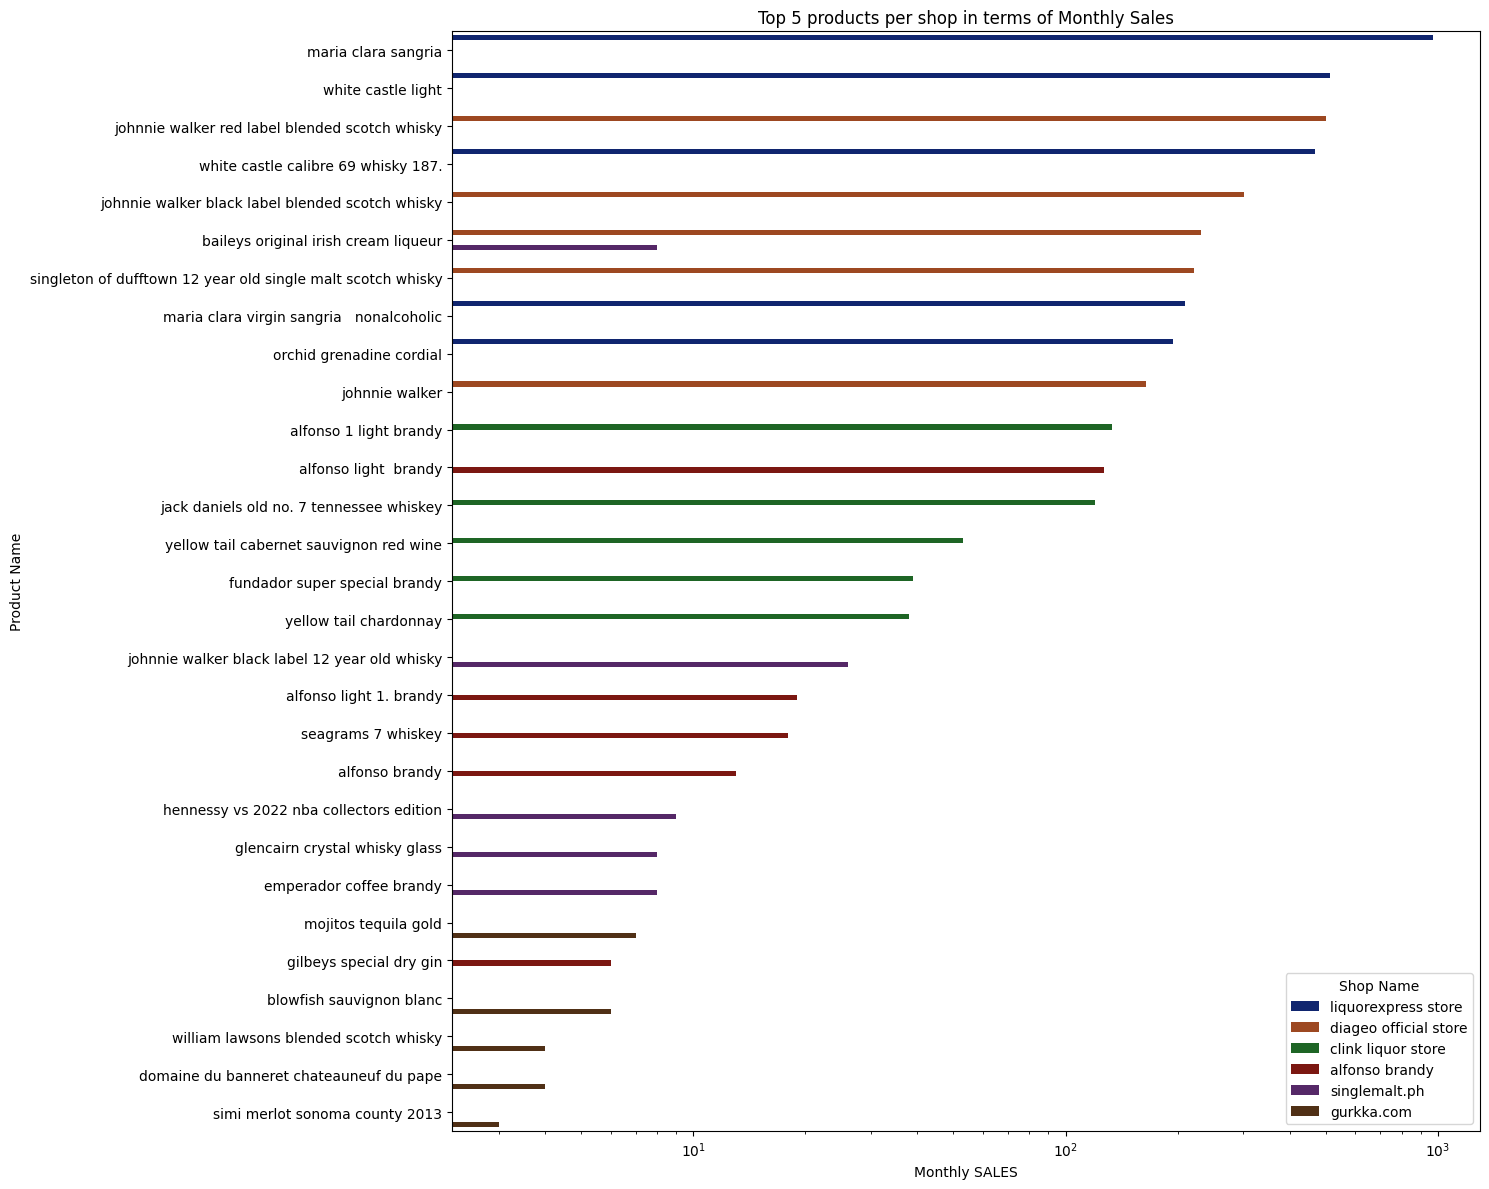

In [71]:
# Top 5 most sold by shop in terms of monthly sales
# Group by 'product_name' and 'shop_name', and sum the 'sold_per_month' to get total sales for each product in each shop
total_sales_per_product = clean_data_df.groupby(['product_name', 'shop_name'])['sold_per_month'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
most_sold_products = total_sales_per_product.sort_values(by='sold_per_month', ascending=False)

# Select the top 5 products per shops
top_products_by_shop = most_sold_products.groupby('shop_name').head(5)

plt.figure(figsize=(15, 12))
ax = sns.barplot(y='product_name', x='sold_per_month', data=top_products_by_shop, hue='shop_name', palette='dark')
legend = ax.legend()
legend.set_title('Shop Name')
plt.xlabel('Monthly SALES')
plt.ylabel('Product Name')
plt.title('Top 5 products per shop in terms of Monthly Sales')
plt.xscale('log')
plt.tight_layout()
plt.show()

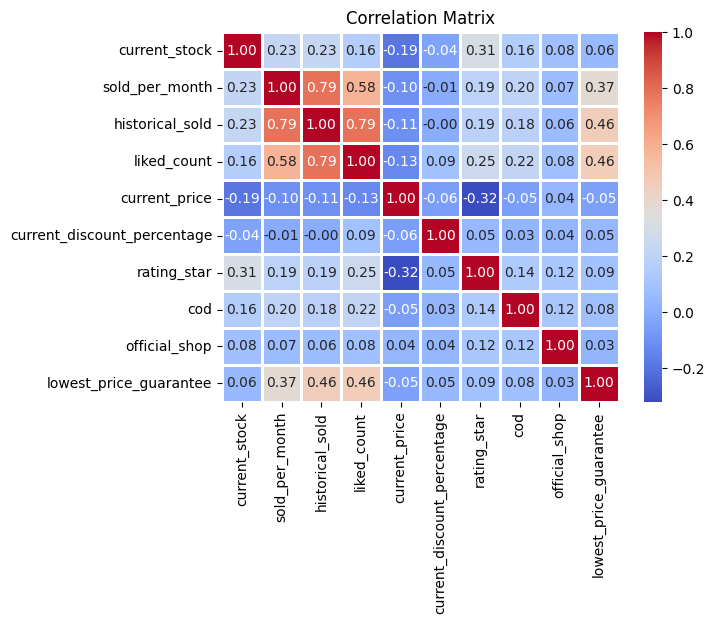

'\nPositive Correlation:\n0.1 to 0.3 : Weak positive correlation\n0.3 to 0.5 : Moderate positive correlation\n0.5 to 1 : Strong positive correlation\n\nNegative Correlation:\n-0.1 to -0.3: Weak negative correlation\n-0.3 to -0.5: Moderate negative correlation\n-0.5 to -1: Strong positive correlation\n\ncurrent_stock and historical_sold (0.23) There is a positive correlation but almost no correlation it means the having a high sales just slightl affect the shop to stock more product.\n'

In [82]:
# Correlational analysis 
corr_matrix = clean_data_df[['current_stock', 'sold_per_month', 'historical_sold', 'liked_count', 'current_price', 'current_discount_percentage', 'rating_star', 'cod',
                             'official_shop', 'lowest_price_guarantee']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlational Matrix')
plt.show()
"""
Positive Correlation:
0.1 to 0.3 : Weak positive correlation
0.3 to 0.5 : Moderate positive correlation
0.5 to 1 : Strong positive correlation

Negative Correlation:
-0.1 to -0.3: Weak negative correlation
-0.3 to -0.5: Moderate negative correlation
-0.5 to -1: Strong positive correlation

current_stock and historical_sold (0.23) There is a positive correlation but almost no correlation it means the having a high sales just slightl affect the shop to stock more product.
"""

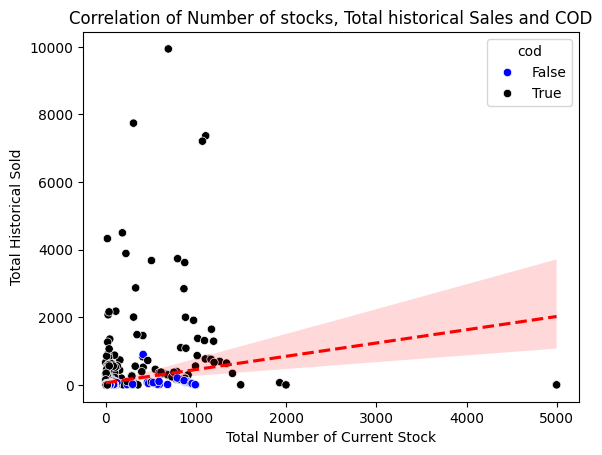

In [142]:
# correlation current_stock and shops and cod
# Set a palette for True (black) and False (blue)
hue_palette = {True: 'black', False: 'blue'}

# Plot scatter plot with hue
sns.scatterplot(y='historical_sold', x='current_stock', data=clean_data_df, hue='cod', palette=hue_palette)

# Regression line
sns.regplot(y='historical_sold', x='current_stock', data=clean_data_df, scatter=False, line_kws={'color': 'red', 'linestyle': '--'})

plt.title('Correlation of Number of stocks, Total historical Sales and COD')
plt.ylabel('Total Historical Sold')
plt.xlabel('Total Number of Current Stock')
plt.show()


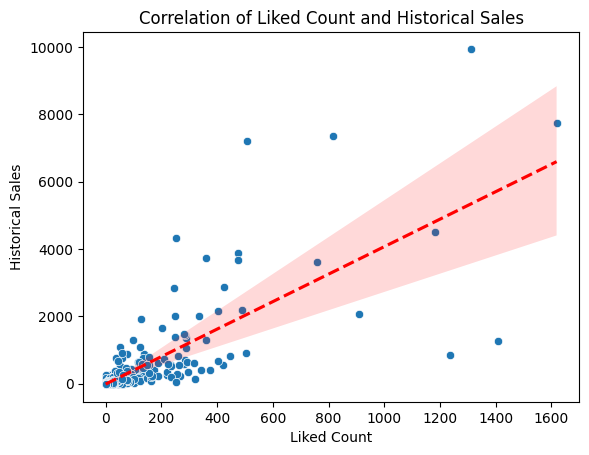

In [141]:
# correlation of number of sales and liked count
sns.scatterplot(x='liked_count', y='historical_sold', data=clean_data_df)
# Regression line
sns.regplot(x='liked_count', y='historical_sold', data=clean_data_df, scatter=False, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Correlation of Liked Count and Historical Sales')
plt.ylabel('Historical Sales')
plt.xlabel('Liked Count')
plt.show()

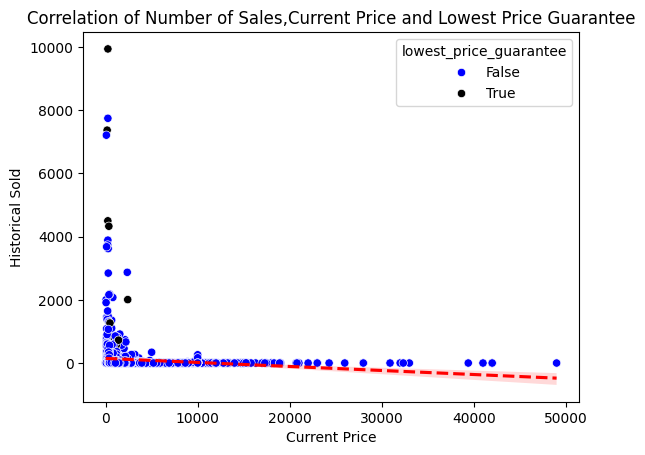

In [136]:
# correlation of number of sales and current_price , lowest_price_guarantee
# Set a palette for True (black) and False (blue)
hue_palette = {True: 'black', False: 'blue'}

# Plot scatter plot with hue
sns.scatterplot(y='historical_sold', x='current_price', data=clean_data_df, hue='lowest_price_guarantee', palette=hue_palette)

# Regression line
sns.regplot(y='historical_sold', x='current_price', data=clean_data_df, scatter=False, line_kws={'color': 'red', 'linestyle': '--'})

plt.title('Correlation of Number of Sales,Current Price and Lowest Price Guarantee')
plt.ylabel('Historical Sold')
plt.xlabel('Current Price')
plt.show()

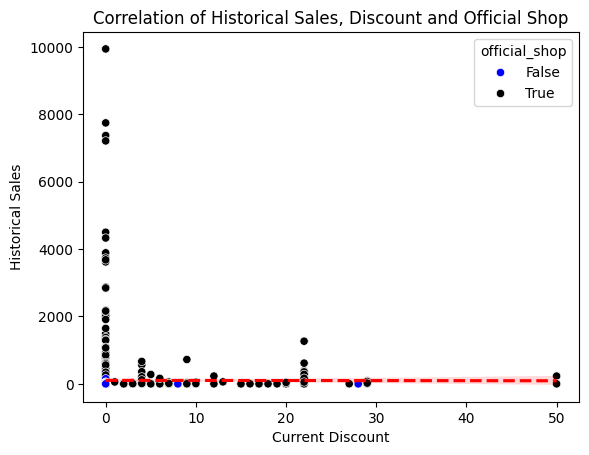

In [11]:
# correlation historical_sold, current_discount, and official shop
# Set a palette for True (black) and False (blue)
hue_palette = {True: 'black', False: 'blue'}

# Plot scatter plot with hue
sns.scatterplot(y='historical_sold', x='current_discount_percentage', data=clean_data_df, hue='official_shop', palette=hue_palette)

# Regression line
sns.regplot(y='historical_sold', x='current_discount_percentage', data=clean_data_df, scatter=False, line_kws={'color': 'red', 'linestyle': '--'})

plt.title('Correlation of Historical Sales, Discount and Official Shop')
plt.ylabel('Historical Sales')
plt.xlabel('Current Discount')
plt.show()


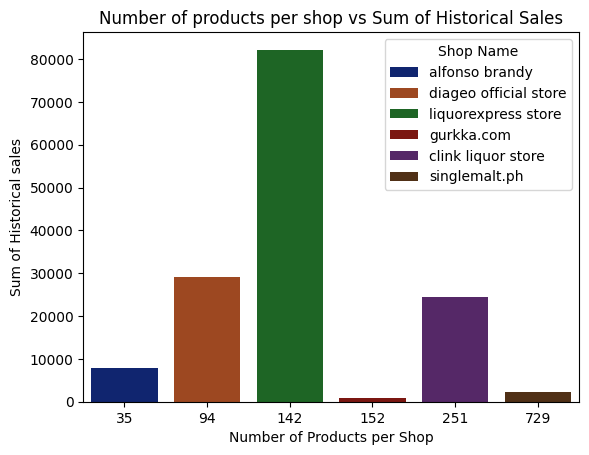

In [75]:
# Shops ordered by the total number of sales
# Get the sum of historical sold for each shop
sum_historical_sold = clean_data_df.groupby('shop_name')['historical_sold'].sum().reset_index()

# Get the number of products of each shop
shop_product_counts = clean_data_df['shop_name'].value_counts().reset_index()
shop_product_counts.columns = ['shop_name', 'product_count']

# Merge the dataframes on 'shop_name'
merged_data = pd.merge(sum_historical_sold, shop_product_counts, on='shop_name')

# Create the bar plot
ax =sns.barplot(x='product_count', y='historical_sold', data=merged_data, hue='shop_name', palette='dark')
legend = ax.legend()
legend.set_title('Shop Name')

# Set x-axis label
plt.xlabel('Number of Products per Shop')

# Set y-axis label
plt.ylabel('Sum of Historical sales')

# Set title
plt.title('Number of products per shop vs Sum of Historical Sales')
# Show the plot
plt.show()

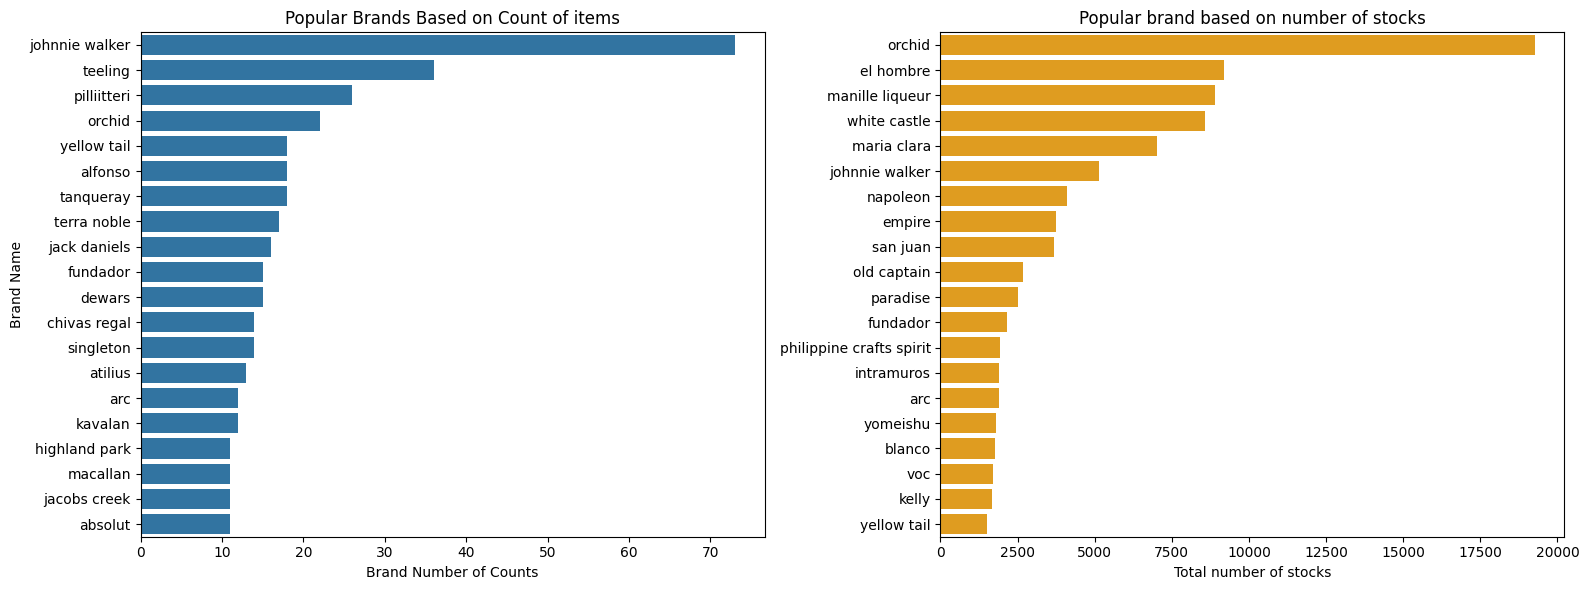

In [88]:
# What is the popular brand for shopee sellers ?
# Filter out rows where the 'brand' column is not 'none liquor brand'
filtered_data = clean_data_df[clean_data_df['brand'] != 'none liquor brand']

# Group by 'brand' and calculate the count and sum of number of stocks
brand_counts = filtered_data['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

brand_stock_sum = filtered_data.groupby('brand')['current_stock'].sum().reset_index()

# Merge the count and sum dataframes
merged_data = pd.merge(brand_counts, brand_stock_sum, on='brand')

# Sort by count in descending order and select the top 20
top_20_brands = merged_data.sort_values(by='count', ascending=False).head(20)

# sort by Total number of stocks
top_20_stocks = merged_data.sort_values(by='current_stock', ascending=False).head(20)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the count on the first subplot
sns.barplot(x='count', y='brand', data=top_20_brands, ax=axes[0])
axes[0].set_title('Popular Brands Based on Count of items')
axes[0].set_xlabel('Brand Number of Counts')
axes[0].set_ylabel('Brand Name')

# Plot the sum of historical sold on the second subplot
sns.barplot(x='current_stock', y='brand', data=top_20_stocks, color='orange', ax=axes[1])
axes[1].set_title('Popular brand based on number of stocks')
axes[1].set_xlabel('Total number of stocks')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


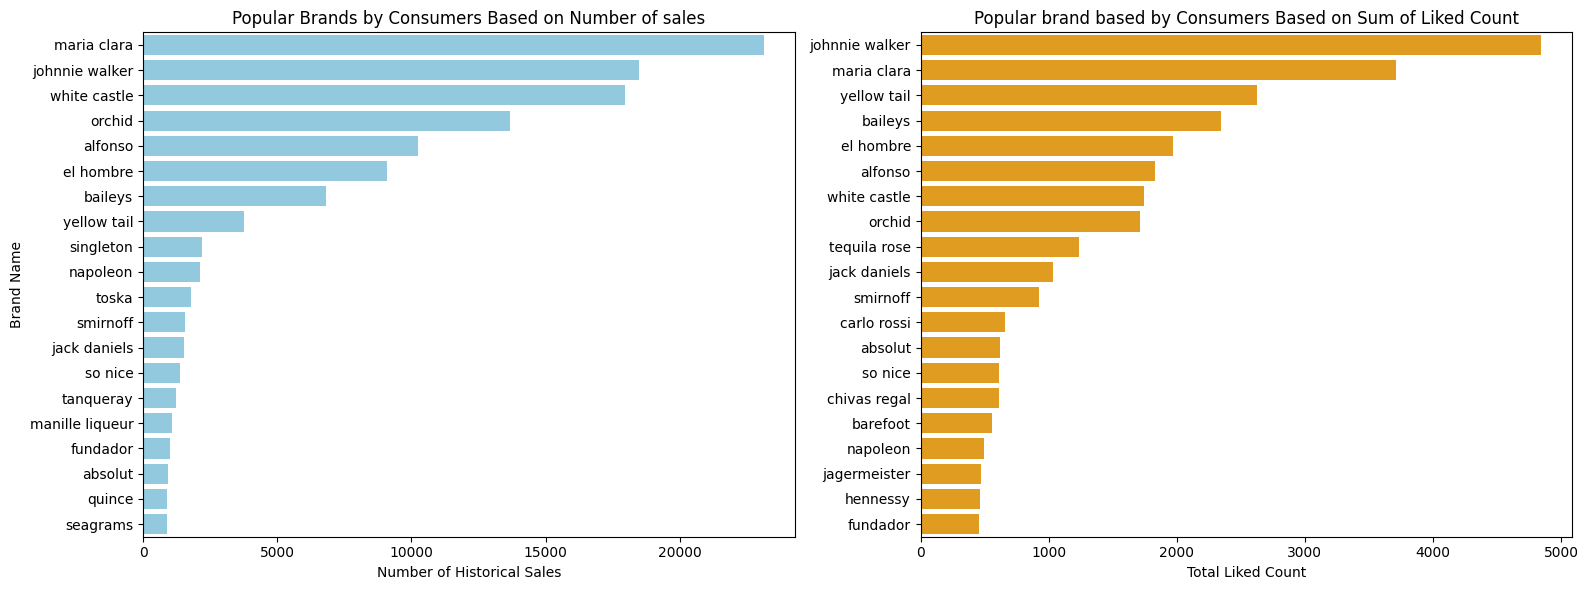

In [87]:
# Popular brands on consumers
# Filter out rows where the 'brand' column is not 'none liquor brand'
filtered_data = clean_data_df[clean_data_df['brand'] != 'none liquor brand']

# Group by 'brand' and calculate the count and sum of number of stocks and liked count
brand_counts = filtered_data['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

brand_sold_sum = filtered_data.groupby('brand')['historical_sold'].sum().reset_index()
brand_liked_sum = filtered_data.groupby('brand')['liked_count'].sum().reset_index()

# Merge the count and sum dataframes
merged_data = pd.merge(brand_counts, brand_sold_sum, on='brand')
merged_data = pd.merge(merged_data, brand_liked_sum, on='brand')  

# Sort by historical_sold in descending order and select the top 20
top_20_sold_brands = merged_data.sort_values(by='historical_sold', ascending=False).head(20)

# sort by Total number of liked_count
top_20_liked_brand = merged_data.sort_values(by='liked_count', ascending=False).head(20)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the count on the historical_sold
sns.barplot(x='historical_sold', y='brand', data=top_20_sold_brands, color='skyblue', ax=axes[0])
axes[0].set_title('Popular Brands by Consumers Based on Number of sales')
axes[0].set_xlabel('Number of Historical Sales')
axes[0].set_ylabel('Brand Name')

# Plot the sum of liked count
sns.barplot(x='liked_count', y='brand', data=top_20_liked_brand, color='orange', ax=axes[1])
axes[1].set_title('Popular brand based by Consumers Based on Sum of Liked Count')
axes[1].set_xlabel('Total Liked Count')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


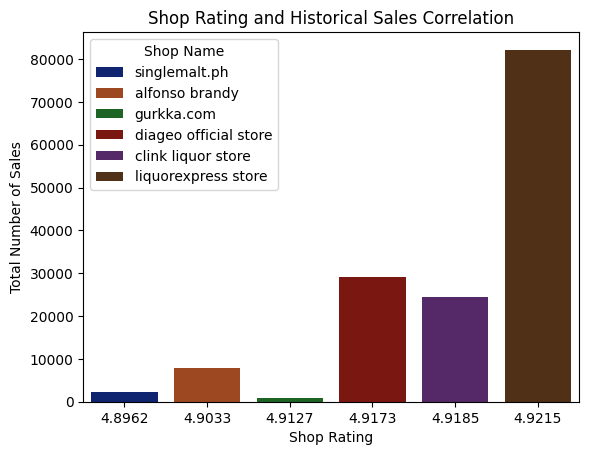

In [29]:
# Correlation of shop rating and sales

# Sum of historical sold by shop
sum_historical_sold = clean_data_df.groupby('shop_name')['historical_sold'].sum().reset_index()

# Shop rating for each shops
shop_rating = clean_data_df.groupby('shop_name')['shop_rating'].mean().reset_index()

# merge the 2 dataframe
merged_data = pd.merge(sum_historical_sold, shop_rating, on='shop_name')
ax = sns.barplot(x='shop_rating', y='historical_sold', data=merged_data, hue='shop_name', palette='dark')
legend = ax.legend()
legend.set_title('Shop Name')

plt.ylabel('Total Number of Sales')
plt.xlabel('Shop Rating')
plt.title('Shop Rating and Historical Sales Correlation')
plt.show()

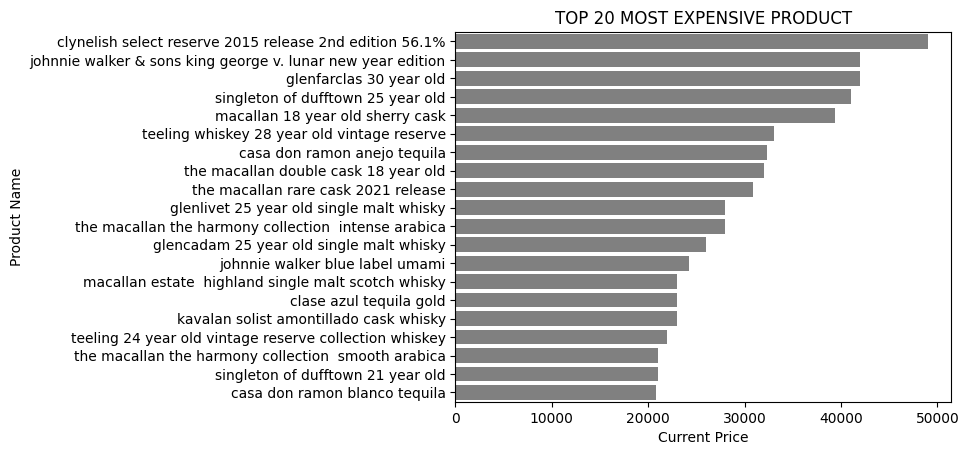

In [131]:
# top 20 Most expensive product
group=clean_data_df.groupby(['product_name', 'current_price'])['sold_per_month'].sum().reset_index()
merged_data=group.sort_values(by='current_price', ascending=False).head(20)
sns.barplot(x='current_price', y='product_name', data=merged_data, color = 'grey')
plt.ylabel("Product Name")
plt.xlabel("Current Price")
plt.title("TOP 20 MOST EXPENSIVE PRODUCT")
plt.show()

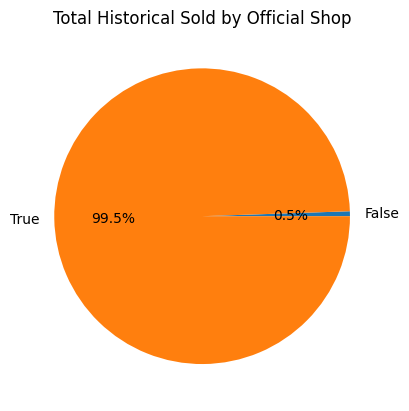

In [18]:
sum_historical_sold = clean_data_df.groupby(['official_shop'])['historical_sold'].sum().reset_index()
plt.pie(sum_historical_sold['historical_sold'], labels=sum_historical_sold['official_shop'], autopct='%1.1f%%')
plt.title('Total Historical Sold by Official Shop')
plt.show()

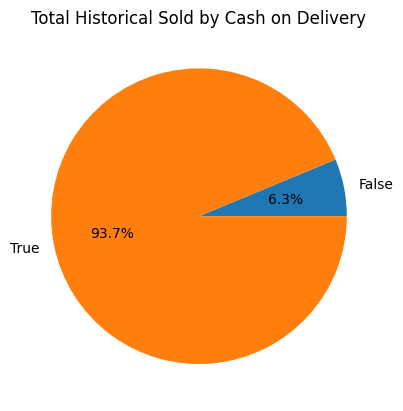

In [37]:
sum_historical_sold = clean_data_df.groupby(['cod'])['historical_sold'].sum().reset_index()
plt.pie(sum_historical_sold['historical_sold'], labels=sum_historical_sold['cod'], autopct='%1.1f%%')
plt.title('Total Historical Sold by Cash on Delivery')
plt.show()

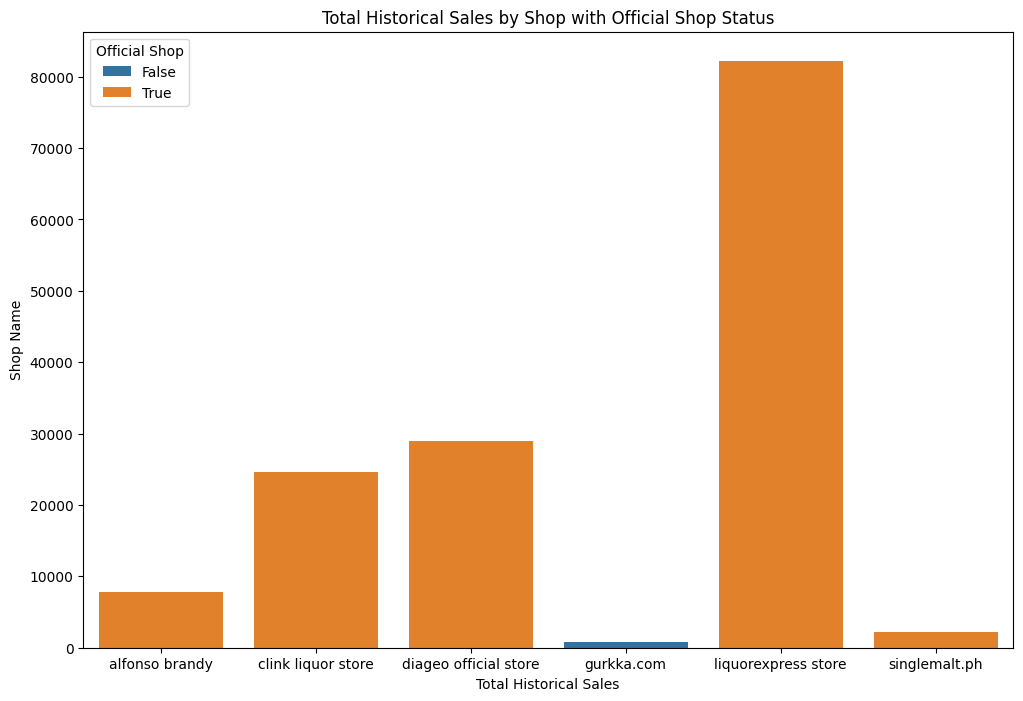

In [32]:
sum_historical_sold = clean_data_df.groupby('shop_name')['historical_sold'].sum().reset_index()
official_shop = clean_data_df.groupby('shop_name')['official_shop'].max().reset_index()  
merged_data = pd.merge(official_shop, sum_historical_sold, on='shop_name')


plt.figure(figsize=(12, 8))
sns.barplot(y='historical_sold', x='shop_name', data=merged_data, hue='official_shop')
plt.xlabel('Total Historical Sales')
plt.ylabel('Shop Name')
plt.title('Total Historical Sales by Shop with Official Shop Status')
plt.legend(title='Official Shop', loc='upper left')
plt.show()

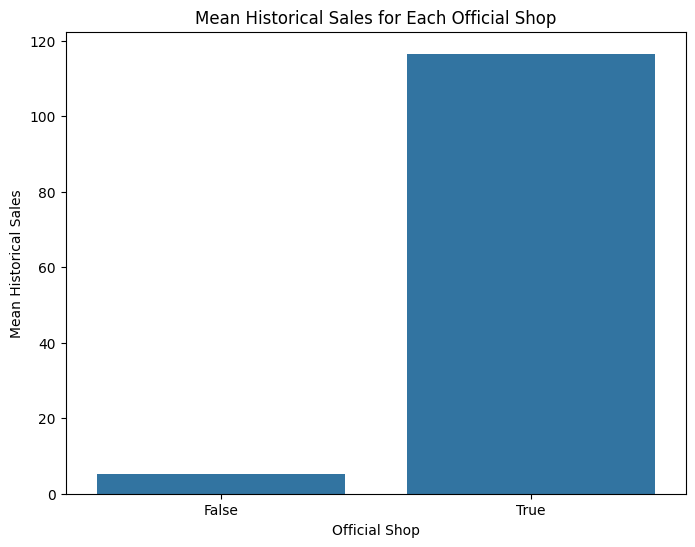

In [63]:
# calculating the average sales of official shop vs non official shop
mean_official_shop = clean_data_df.groupby('official_shop')['historical_sold'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_official_shop.index, y=mean_official_shop.values)
plt.xlabel('Official Shop')
plt.ylabel('Mean Historical Sales')
plt.title('Mean Historical Sales for Each Official Shop')
plt.show()

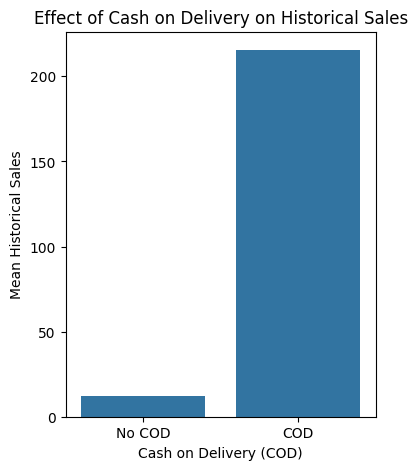

In [55]:
# Average historical sales in terms of cod
plt.figure(figsize=(4, 5))
sns.barplot(x='cod', y='historical_sold', data=clean_data_df, errorbar=None, estimator=np.mean)
plt.xlabel('Cash on Delivery (COD)')
plt.ylabel('Mean Historical Sales')
plt.title('Effect of Cash on Delivery on Historical Sales')
plt.xticks([0, 1], ['No COD', 'COD'])
plt.show()